<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [50]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly

In [2]:
#Obtener datos de archivo
icfes2020 = pd.read_csv(".//Archivos/SB11_20201.txt", sep="¬")
icfes2021 = pd.read_csv(".//Archivos/SB11_20211.txt", sep="¬")

<ipython-input-2-eddd7afd83a7>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  icfes2020 = pd.read_csv(".//Archivos/SB11_20201.txt", sep="¬")
<ipython-input-2-eddd7afd83a7>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  icfes2021 = pd.read_csv(".//Archivos/SB11_20211.txt", sep="¬")


In [3]:
# Revisión de la información en los datafram
def tamaño (dataframe):
    tamaño = dataframe.shape
    impresión = print("Cantidad de variables:"+str(tamaño[1])+" Cantidad de observaciones:"+str(tamaño[0]))
    return impresión

def variables (dataframe):
    variables = pd.DataFrame(dataframe.columns.values)
    return variables

def tipo_variables(dataframe):
    tipo = dataframe.dtypes
    return tipo

def detalles_variables(dataframe):
    info=dataframe.describe(include="object")
    return info

def datos_faltantes(dataframe):
    miss_values_count = dataframe.isnull().sum(min_count=1)
    miss_values_count = miss_values_count[miss_values_count != 0]
    print(f"Número de columnas con datos faltantes: {miss_values_count.shape[0]}")
    if miss_values_count.shape[0]:
        print("Recuento de valores nulos por columna: ")
        for name, miss_vals in miss_values_count.items():
            p = miss_vals > 1
            print(f"  - A la columna '{name}' le falta{'n' if p else ''} "
                     f"{miss_vals} dato{'s' if p else ''}.")

def imputar_faltantes (dataframe):
    for variable in dataframe:
        dataframe[variable] = dataframe[variable].fillna(dataframe[variable].mode())
    return dataframe    
    
def seleccion_variables_usar(dataframe, variables_seleccionadas):
    variables = []
    for columna in dataframe.columns:
        if columna in variables_seleccionadas:
            variables.append(columna)
    nueva_base=dataframe[variables]
    return nueva_base


In [ ]:
#Para el desarrollo del modelo se utilizará la información reportada para los resultados de los examenes ICFES del periodo 1 del año 2020 y la del periodo 1 del año 2021. NO se realizará una únion de los dataframe debido a
#que se buscará realizar una revisión de la afectación que pudo tener el acceso a tecnología e internet durante la pandemia causada por el COVID19 en los resultados de los estudiantes.

#Se revisarán los dos dataframa y sus características para poder contrastar su información. 

In [4]:
# Revisión de la información de los resultados ICFES del año 2020

tamaño(icfes2020)

Cantidad de variables:81 Cantidad de observaciones:15435


In [5]:
tipo_variables(icfes2020)

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
ESTU_INSE_INDIVIDUAL        float64
ESTU_NSE_INDIVIDUAL         float64
ESTU_NSE_ESTABLECIMIENTO    float64
ESTU_ESTADOINVESTIGACION     object
ESTU_GENERACION-E            object
Length: 81, dtype: object

In [22]:
detalles_variables(icfes2020)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,DESEMP_INGLES,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
count,15435,15435,15434,15435,15435,15435,15435,14671,14671,14671,...,15435,15435,15435,15435,15435,15435,15435,15435,15435,15435
unique,10,21,2,3636,15435,1,21,2,27,192,...,2,6,103,25,2,64,28,5,2,4
top,TI,COLOMBIA,M,21/06/2002,SB11202010006982,ESTUDIANTE,COLOMBIA,No,VALLE,CALI,...,URBANO,COMPLETA,CALI,VALLE,N,CALI,VALLE,B1,PUBLICAR,NO
freq,12526,15321,7846,30,1,15435,15321,14518,6301,4927,...,13503,7727,5082,6539,15433,5396,6535,3823,15219,13380


In [23]:
datos_faltantes(icfes2020)

Número de columnas con datos faltantes: 37
Recuento de valores nulos por columna: 
  - A la columna 'ESTU_GENERO' le falta 1 dato.
  - A la columna 'ESTU_TIENEETNIA' le faltan 764 datos.
  - A la columna 'ESTU_DEPTO_RESIDE' le faltan 764 datos.
  - A la columna 'ESTU_COD_RESIDE_DEPTO' le faltan 764 datos.
  - A la columna 'ESTU_MCPIO_RESIDE' le faltan 764 datos.
  - A la columna 'ESTU_COD_RESIDE_MCPIO' le faltan 764 datos.
  - A la columna 'FAMI_ESTRATOVIVIENDA' le faltan 1558 datos.
  - A la columna 'FAMI_PERSONASHOGAR' le faltan 1407 datos.
  - A la columna 'FAMI_CUARTOSHOGAR' le faltan 1439 datos.
  - A la columna 'FAMI_EDUCACIONPADRE' le faltan 1549 datos.
  - A la columna 'FAMI_EDUCACIONMADRE' le faltan 1544 datos.
  - A la columna 'FAMI_TRABAJOLABORPADRE' le faltan 1456 datos.
  - A la columna 'FAMI_TRABAJOLABORMADRE' le faltan 1460 datos.
  - A la columna 'FAMI_TIENEINTERNET' le faltan 1529 datos.
  - A la columna 'FAMI_TIENESERVICIOTV' le faltan 1544 datos.
  - A la columna 'FA

In [26]:
imputar_faltantes(icfes2020)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,CC,COLOMBIA,F,01/01/1985,20201,SB11202010045555,ESTUDIANTE,COLOMBIA,No,CESAR,...,36.0,7,A-,164,2.0,32.982652,1.0,1.0,VALIDEZ OFICINA JURÍDICA,GENERACION E - GRATUIDAD
1,CC,COLOMBIA,F,01/01/1995,20201,SB11202010045719,ESTUDIANTE,COLOMBIA,No,NARIÑO,...,30.0,3,A-,202,10.0,NaN,NaN,2.0,PUBLICAR,GENERACION E - GRATUIDAD
2,CC,COLOMBIA,F,01/01/1997,20201,SB11202010070662,ESTUDIANTE,COLOMBIA,Si,CAUCA,...,30.0,3,A-,162,2.0,37.868242,1.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CC,COLOMBIA,F,01/01/2001,20201,SB11202010069926,ESTUDIANTE,COLOMBIA,No,PUTUMAYO,...,37.0,8,A-,188,6.0,54.880608,3.0,2.0,PUBLICAR,NO
4,CC,COLOMBIA,F,01/02/2001,20201,SB11202010023181,ESTUDIANTE,COLOMBIA,No,RISARALDA,...,80.0,80,B+,274,39.0,65.015303,4.0,4.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15430,TI,ITALIA,F,24/08/0003,20201,SB11202010002849,ESTUDIANTE,ITALIA,No,VALLE,...,73.0,62,B1,303,54.0,62.266607,3.0,4.0,PUBLICAR,NO
15431,TI,PAÍSES BAJOS - HOLANDA,F,21/05/2002,20201,SB11202010004430,ESTUDIANTE,PAÍSES BAJOS - HOLANDA,No,VALLE,...,100.0,100,B+,366,91.0,68.812765,4.0,4.0,PUBLICAR,NO
15432,TI,VENEZUELA,F,07/12/2001,20201,SB11202010008503,ESTUDIANTE,VENEZUELA,No,BOGOTÁ,...,79.0,77,B+,337,76.0,NaN,NaN,4.0,PUBLICAR,NO
15433,TI,VENEZUELA,F,25/04/2003,20201,SB11202010072919,ESTUDIANTE,VENEZUELA,No,NORTE SANTANDER,...,40.0,11,A-,253,28.0,43.864856,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


In [31]:
# Revisión de la información de los resultados ICFES del año 2021

tamaño(icfes2021)

Cantidad de variables:78 Cantidad de observaciones:15528


In [32]:
tipo_variables(icfes2021)

ESTU_TIPODOCUMENTO            object
ESTU_NACIONALIDAD             object
ESTU_GENERO                   object
ESTU_FECHANACIMIENTO          object
PERIODO                        int64
                              ...   
DESEMP_INGLES                 object
PUNT_GLOBAL                    int64
PERCENTIL_ESPECIAL_GLOBAL    float64
PERCENTIL_GLOBAL             float64
ESTU_ESTADOINVESTIGACION      object
Length: 78, dtype: object

In [33]:
detalles_variables(icfes2021)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,DESEMP_INGLES,ESTU_ESTADOINVESTIGACION
count,15528,15528,15523,15528,15528,15528,15528,13837,15520,15520,...,15528,15528,15528,15528,15528,15528,15528,15528,15481,15528
unique,8,24,2,2863,15528,1,24,2,29,142,...,2,2,6,102,28,2,66,29,5,3
top,TI,COLOMBIA,M,03/04/2003,SB11202110033184,ESTUDIANTE,COLOMBIA,No,VALLE,CALI,...,S,URBANO,COMPLETA,CALI,VALLE,N,CALI,VALLE,B+,PUBLICAR
freq,13268,15408,7793,30,1,15528,15408,13704,7066,5480,...,15525,13263,9028,5467,7083,15513,5887,7067,5385,15524


In [35]:
datos_faltantes(icfes2021)

Número de columnas con datos faltantes: 37
Recuento de valores nulos por columna: 
  - A la columna 'ESTU_GENERO' le faltan 5 datos.
  - A la columna 'ESTU_TIENEETNIA' le faltan 1691 datos.
  - A la columna 'ESTU_DEPTO_RESIDE' le faltan 8 datos.
  - A la columna 'ESTU_COD_RESIDE_DEPTO' le faltan 8 datos.
  - A la columna 'ESTU_MCPIO_RESIDE' le faltan 8 datos.
  - A la columna 'ESTU_COD_RESIDE_MCPIO' le faltan 8 datos.
  - A la columna 'FAMI_ESTRATOVIVIENDA' le faltan 756 datos.
  - A la columna 'FAMI_PERSONASHOGAR' le faltan 537 datos.
  - A la columna 'FAMI_CUARTOSHOGAR' le faltan 553 datos.
  - A la columna 'FAMI_EDUCACIONPADRE' le faltan 684 datos.
  - A la columna 'FAMI_EDUCACIONMADRE' le faltan 696 datos.
  - A la columna 'FAMI_TRABAJOLABORPADRE' le faltan 559 datos.
  - A la columna 'FAMI_TRABAJOLABORMADRE' le faltan 555 datos.
  - A la columna 'FAMI_TIENEINTERNET' le faltan 680 datos.
  - A la columna 'FAMI_TIENECOMPUTADOR' le faltan 526 datos.
  - A la columna 'FAMI_TIENELAVADO

In [34]:
imputar_faltantes(icfes2021)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,PERCENTIL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,M,05/11/2003,20211,SB11202110042506,ESTUDIANTE,COLOMBIA,No,VALLE,...,56,40,3,61.0,35.0,A2,303,60.0,46.0,PUBLICAR
1,TI,COLOMBIA,F,06/10/2004,20211,SB11202110041799,ESTUDIANTE,COLOMBIA,No,VALLE,...,61,53,3,69.0,45.0,B1,325,NaN,62.0,PUBLICAR
2,TI,COLOMBIA,F,01/10/2003,20211,SB11202110043835,ESTUDIANTE,COLOMBIA,No,VALLE,...,73,90,4,69.0,46.0,B1,374,NaN,92.0,PUBLICAR
3,TI,COLOMBIA,F,13/01/2003,20211,SB11202110043668,ESTUDIANTE,COLOMBIA,No,VALLE,...,53,32,2,60.0,33.0,A2,282,NaN,34.0,PUBLICAR
4,TI,COLOMBIA,F,29/08/2004,20211,SB11202110043350,ESTUDIANTE,COLOMBIA,No,VALLE,...,53,34,2,60.0,33.0,A2,288,NaN,38.0,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,CC,COLOMBIA,F,02/01/2003,20211,SB11202110039404,ESTUDIANTE,COLOMBIA,No,CESAR,...,33,5,1,33.0,3.0,A-,179,NaN,3.0,PUBLICAR
15524,TI,COLOMBIA,F,03/04/2004,20211,SB11202110038427,ESTUDIANTE,COLOMBIA,No,VALLE,...,50,26,2,57.0,28.0,A1,254,NaN,21.0,PUBLICAR
15525,TI,COLOMBIA,M,06/06/2004,20211,SB11202110038394,ESTUDIANTE,COLOMBIA,No,VALLE,...,57,43,3,56.0,25.0,A1,303,NaN,46.0,PUBLICAR
15526,TI,COLOMBIA,F,14/01/2004,20211,SB11202110038872,ESTUDIANTE,COLOMBIA,No,VALLE,...,49,24,2,62.0,35.0,A2,285,NaN,36.0,PUBLICAR


In [2]:
#Revisando el dataset de los resultados de las pruebas Saber11 para los años 2020 y 2021 encontramos que los reportes están conformados por variables 81 variables y por 78 variables respectivamente, así mismo dentro de cada set encontramos más de 15 mil observaciones. Para las variable sincluídas en los reportes
#podemos clasificar estas variables en 3 tipos: variables como: 1.) variables de identificación única como lo son ESTU_TIPODOCUMENTO y ESTU_CONSECUTIVO, 2.) Variables demográficas:  ESTU_NACIONALIDAD y ESTU_GENERO y 3.) las variables clasificatorias icfes como lo son PUNT_GLOBALl
# ESTU_INSE_INDIVIDUAL.  Las variables que se encuentran en los resultados del año 2020 y no los del año 2021 ESTU_NSE_ESTABLECIMIENTO, ESTU_ESTADOINVESTIGACION y ESTU_GENERACION-E

#Adcionalmente, encontramos que para ambos dataset 37 variables presentan datos faltantes dentro de sus registros, donde la variable 'COLE_BILINGUE' es la que presenta la mayor cantidad de datos faltantes. Algunas de las variables con faltantes tienen 
#eplicación clara y puede deberse a que el atributo de interes que se registra en esa variable no aplica para la observación como sucede con la variable ESTU_TIENEETNIA debido a que no toas las personas tienen etnia.

#Por lo amterior y para realizar el desarrollo del estudio se dejara solo la variable de identificación ESTU_CONSECUTIVO como el indice del dataframe, se seleccionaran las variables  demográficas que nos otorgan información sobre
#las características del persona y se descasrtaran las variables que indican posesiones como lo son 'FAMI_TIENEMOTOCICLETA. Esto se realiza debido a que no ofrecen información relevante sobre el efecto de la pandemoa en los resultados de la prueba.
#Para el caso de las variables de clasificación icfes no se descartará ninguna variable.

# De acuerdo a lo anterior el listado de variables que se usarán para el análisis son las presentadas en la lista variables y se presentan a continuacuón: ESTU_GENERO, ESTU_CONSECUTIVO,  ESTU_PAIS_RESIDE,  FAMI_ESTRATOVIVIENDA, FAMI_PERSONASHOGAR, FAMI_CUARTOSHOGAR, FAMI_EDUCACIONPADRE
#FAMI_EDUCACIONMADRE, FAMI_TRABAJOLABORPADRE, FAMI_TRABAJOLABORMADRE, FAMI_TIENEINTERNET, FAMI_TIENESERVICIOTV, FAMI_TIENECOMPUTADOR, FAMI_NUMLIBROS, FAMI_SITUACIONECONOMICA, ESTU_DEDICACIONLECTURADIARIA,
#ESTU_DEDICACIONINTERNET,  PUNT_LECTURA_CRITICA, PERCENTIL_LECTURA_CRITICA, DESEMP_LECTURA_CRITICA, PUNT_MATEMATICAS, PERCENTIL_MATEMATICAS, DESEMP_MATEMATICAS, PUNT_C_NATURALES, 
#PERCENTIL_C_NATURALES, DESEMP_C_NATURALES, PUNT_SOCIALES_CIUDADANAS, PERCENTIL_SOCIALES_CIUDADANAS, DESEMP_SOCIALES_CIUDADANAS, PUNT_INGLES, PERCENTIL_INGLES, DESEMP_INGLES, PUNT_GLOBAL
# PERCENTIL_GLOBAL y ESTU_GENERACION-E.


#Una vez determinada y para facilitar el desarrollo del estudio se realizó una imputación de los valores faltantes con la moda correspondiente a cada variable. Esto para poder otorgar a los registros con faltantes una caracterízación común y no 
#no se cree un valor aislado en la muestra.


In [24]:
#Lista con las variables a utilizar en el modelo
variables = ["ESTU_CONSECUTIVO","PERIODO", "FAMI_ESTRATOVIVIENDA", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET", "FAMI_TIENESERVICIOTV", "FAMI_TIENECOMPUTADOR", "FAMI_NUMLIBROS", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "PUNT_LECTURA_CRITICA", "PERCENTIL_LECTURA_CRITICA", "DESEMP_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PERCENTIL_MATEMATICAS", "DESEMP_MATEMATICAS", "PUNT_C_NATURALES", "PERCENTIL_C_NATURALES", "DESEMP_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PERCENTIL_SOCIALES_CIUDADANAS", "DESEMP_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PERCENTIL_INGLES", "DESEMP_INGLES", "PUNT_GLOBAL", "PERCENTIL_GLOBAL"]

In [25]:
#Resultados 2020
#Se filtra el dataframe con las variables seleccionadas para el modelo
df2020=seleccion_variables_usar(icfes2020,variables)
df2020.set_index("ESTU_CONSECUTIVO", inplace = True)
df2020

,PERIODO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_NUMLIBROS,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11202010045555,20201,Estrato 1,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia",Trabaja por cuenta propia (por ejemplo plomero...,No,No,No,0 A 10 LIBROS,...,6,1,24,1,1,36.0,7,A-,164,2.0
SB11202010045719,20201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,1,44,23,2,30.0,3,A-,202,10.0
SB11202010070662,20201,Estrato 1,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,0 A 10 LIBROS,...,4,1,24,1,1,30.0,3,A-,162,2.0
SB11202010069926,20201,Estrato 1,Técnica o tecnológica completa,Educación profesional completa,"Es dueño de un negocio grande, tiene un cargo ...","Trabaja como profesional (por ejemplo médico, ...",Si,No,Si,11 A 25 LIBROS,...,10,1,33,7,1,37.0,8,A-,188,6.0
SB11202010023181,20201,Estrato 6,Educación profesional completa,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,26 A 100 LIBROS,...,32,2,53,42,2,80.0,80,B+,274,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SB11202010002849,20201,Estrato 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Pensionado,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,26 A 100 LIBROS,...,72,3,60,60,3,73.0,62,B1,303,54.0
SB11202010004430,20201,Estrato 5,No Aplica,No Aplica,No aplica,No aplica,Si,Si,Si,MÁS DE 100 LIBROS,...,91,4,70,86,3,100.0,100,B+,366,91.0
SB11202010008503,20201,Estrato 5,Primaria incompleta,Educación profesional completa,NaN,NaN,Si,Si,NaN,26 A 100 LIBROS,...,75,3,64,69,3,79.0,77,B+,337,76.0


In [26]:
#Revisamos la información del dataframe construido 
#df2020.head(5)
tamaño(df2020)

Cantidad de variables:29 Cantidad de observaciones:15435


In [27]:
df2020.head(5)

,PERIODO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_NUMLIBROS,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11202010045555,20201,Estrato 1,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia",Trabaja por cuenta propia (por ejemplo plomero...,No,No,No,0 A 10 LIBROS,...,6,1,24,1,1,36.0,7,A-,164,2.0
SB11202010045719,20201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,1,44,23,2,30.0,3,A-,202,10.0
SB11202010070662,20201,Estrato 1,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,0 A 10 LIBROS,...,4,1,24,1,1,30.0,3,A-,162,2.0
SB11202010069926,20201,Estrato 1,Técnica o tecnológica completa,Educación profesional completa,"Es dueño de un negocio grande, tiene un cargo ...","Trabaja como profesional (por ejemplo médico, ...",Si,No,Si,11 A 25 LIBROS,...,10,1,33,7,1,37.0,8,A-,188,6.0
SB11202010023181,20201,Estrato 6,Educación profesional completa,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,26 A 100 LIBROS,...,32,2,53,42,2,80.0,80,B+,274,39.0


In [15]:
#Eliminaremos las observaciones que posean valores nules para la variable "FAMI_TIENEINTERNET"
df2020=  df2020[df2020['FAMI_TIENEINTERNET'].notna()]
tamaño(df2020)

Cantidad de variables:28 Cantidad de observaciones:13906


In [28]:
#Resultados 2021
#Se filtra el dataframe con las variables seleccionadas para el modelo
df2021=seleccion_variables_usar(icfes2021,variables)
df2021.set_index("ESTU_CONSECUTIVO", inplace = True)
df2021

,PERIODO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENESERVICIOTV,FAMI_NUMLIBROS,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11202110042506,20211,Estrato 5,No sabe,Secundaria (Bachillerato) completa,No sabe,Trabaja por cuenta propia (por ejemplo plomero...,Si,No,Si,0 A 10 LIBROS,...,59,3,56,40,3,61.0,35.0,A2,303,46.0
SB11202110041799,20211,Estrato 3,Educación profesional incompleta,Secundaria (Bachillerato) completa,"Es dueño de un negocio grande, tiene un cargo ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,11 A 25 LIBROS,...,64,3,61,53,3,69.0,45.0,B1,325,62.0
SB11202110043835,20211,Estrato 3,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,0 A 10 LIBROS,...,63,3,73,90,4,69.0,46.0,B1,374,92.0
SB11202110043668,20211,Estrato 4,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,26 A 100 LIBROS,...,35,2,53,32,2,60.0,33.0,A2,282,34.0
SB11202110043350,20211,Estrato 5,Primaria completa,Secundaria (Bachillerato) completa,"Es dueño de un negocio grande, tiene un cargo ...",Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,11 A 25 LIBROS,...,33,2,53,34,2,60.0,33.0,A2,288,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SB11202110039404,20211,Estrato 1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,"Trabaja como profesional (por ejemplo médico, ...",Pensionado,No,No,Si,11 A 25 LIBROS,...,1,1,33,5,1,33.0,3.0,A-,179,3.0
SB11202110038427,20211,Estrato 4,Educación profesional completa,Técnica o tecnológica incompleta,"Trabaja como profesional (por ejemplo médico, ...",Es vendedor o trabaja en atención al público,Si,Si,Si,0 A 10 LIBROS,...,29,2,50,26,2,57.0,28.0,A1,254,21.0
SB11202110038394,20211,Estrato 3,Postgrado,Educación profesional completa,"Trabaja como personal de limpieza, mantenimien...",Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,26 A 100 LIBROS,...,81,3,57,43,3,56.0,25.0,A1,303,46.0


In [17]:
#Eliminaremos las observaciones que posean valores nules para la variable "FAMI_TIENEINTERNET"
df2021=  df2021[df2021['FAMI_TIENEINTERNET'].notna()]
tamaño(df2021)

Cantidad de variables:28 Cantidad de observaciones:14848


In [ ]:
#Los dataframe a utilizar para el modelo son los llamados df2020 y df2021. Cada uno de ellos tienen 28 variables, el indice es el consecutivo del estudiante y se eliminaron los valores nulos de  nuestra variable FAMI_TIENEINTERNET

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

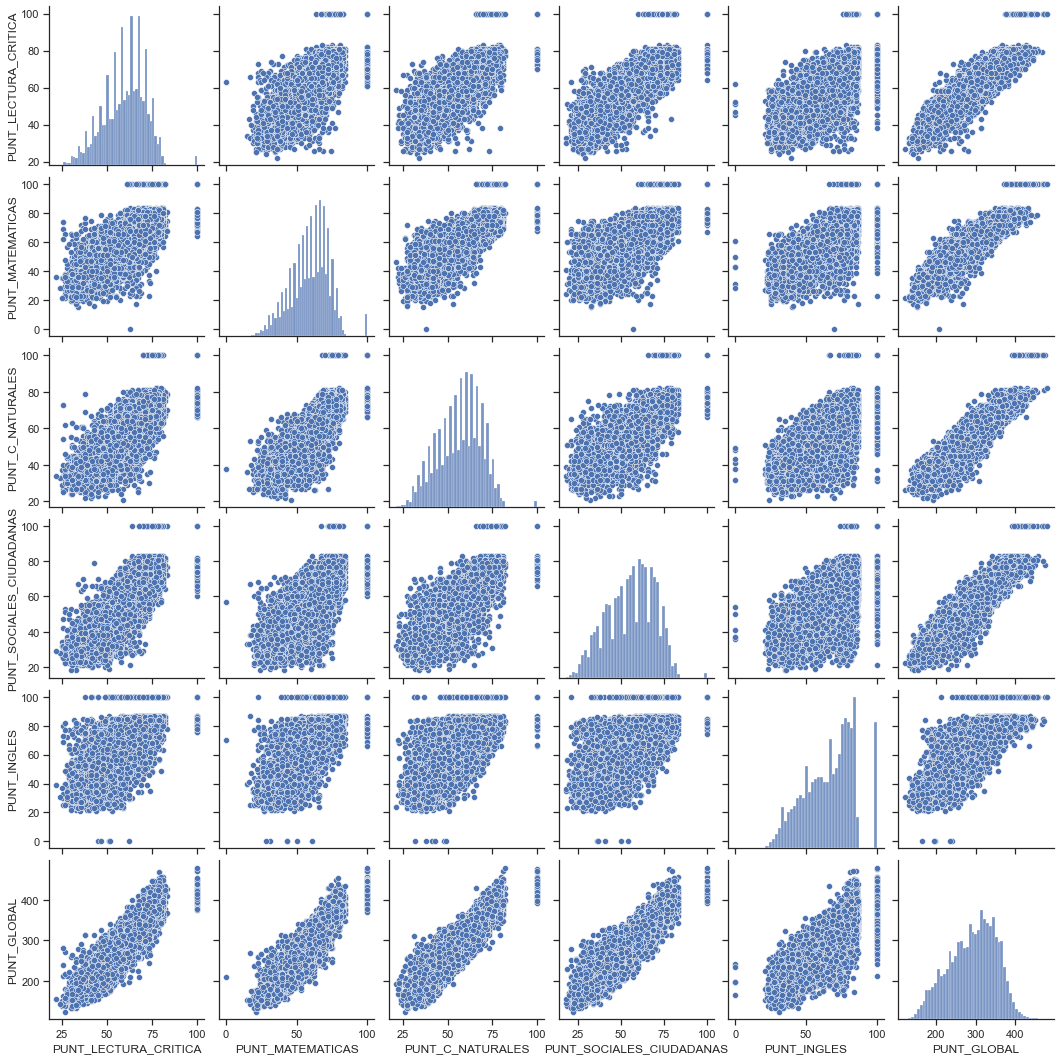

In [22]:
# Código
#realizaré una representación visual por medio de un gráfico pairplor para poder identificar relaciones entre los puntajes de las diferentes competencias del ICFES. 
#Año 2020
variables_pair=["PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",  "PUNT_SOCIALES_CIUDADANAS",  "PUNT_INGLES",  "PUNT_GLOBAL",]
pair2020=seleccion_variables_usar(df2020,variables_pair)
sns.set_theme(style="ticks")
sns.pairplot(pair2020)

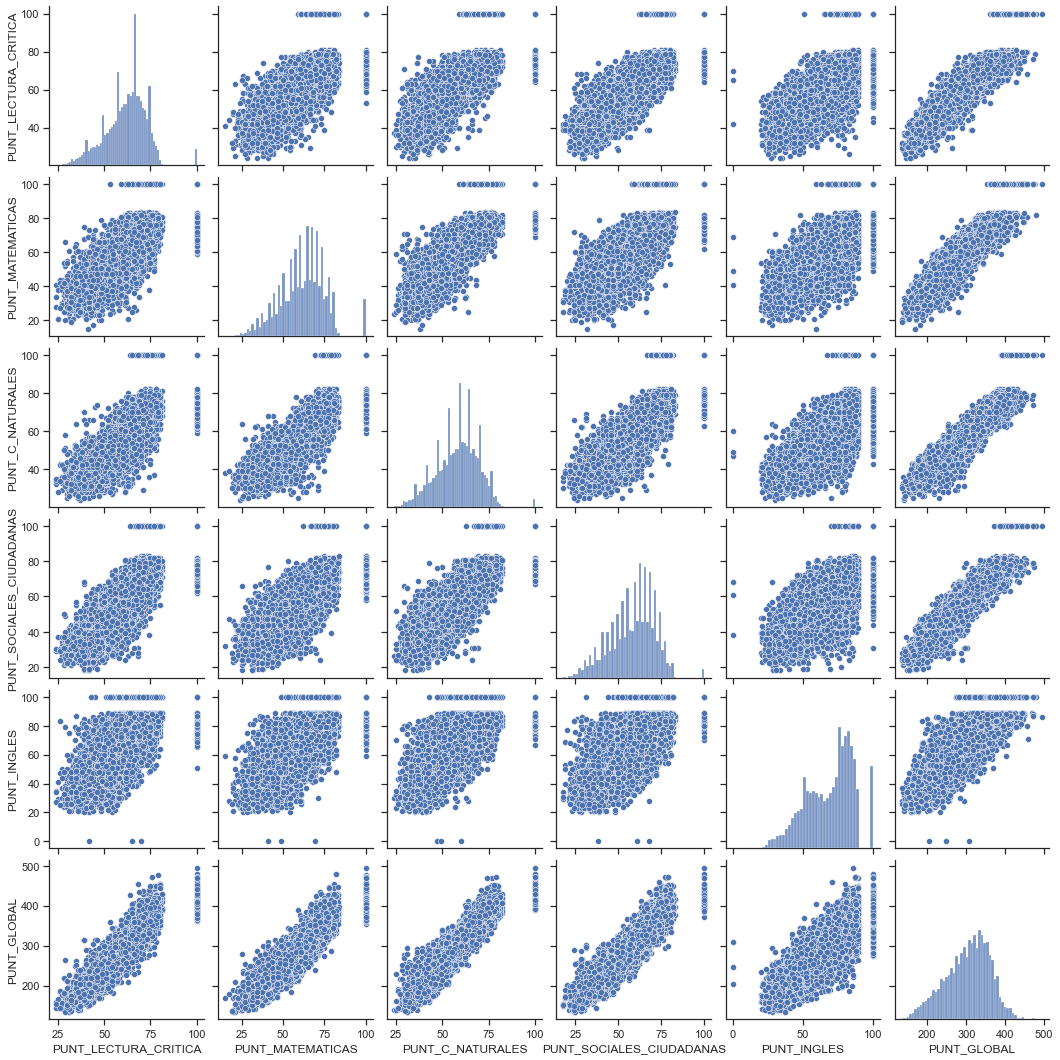

In [23]:
# Código
#realizaré una representación visual por medio de un gráfico pairplor para poder identificar relaciones entre los puntajes de las diferentes competencias del ICFES. 
#Año 2021
variables_pair=["PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",  "PUNT_SOCIALES_CIUDADANAS",  "PUNT_INGLES",  "PUNT_GLOBAL"]
pair2021=seleccion_variables_usar(df2021,variables_pair)
sns.set_theme(style="ticks")
sns.pairplot(pair2021)

In [ ]:
#Para la construcción de los pairplots se realizó una selección de variables, donde el dataframe utilizado para la represetnación gráfica los puntajes de cada una de las competencias evaluadas y se descartaron los variables de percentiles 
#y desempeño debido a que los resultados en estos dependen directamente de los puntajes. Adicionalmente, y aprovechando el pair plot se confirmó que el puntaje global está directamente relacionado con el desempeño en cada una de las competencias. 
#Aun cuando este hecho puede ser predecible se realiza la validación para confirmar que el puntaje final no estuviera relacionado con algpun otro factor. 

#A continuación, se presenta un pari plot unificado de las dos dataframe para su análisis:

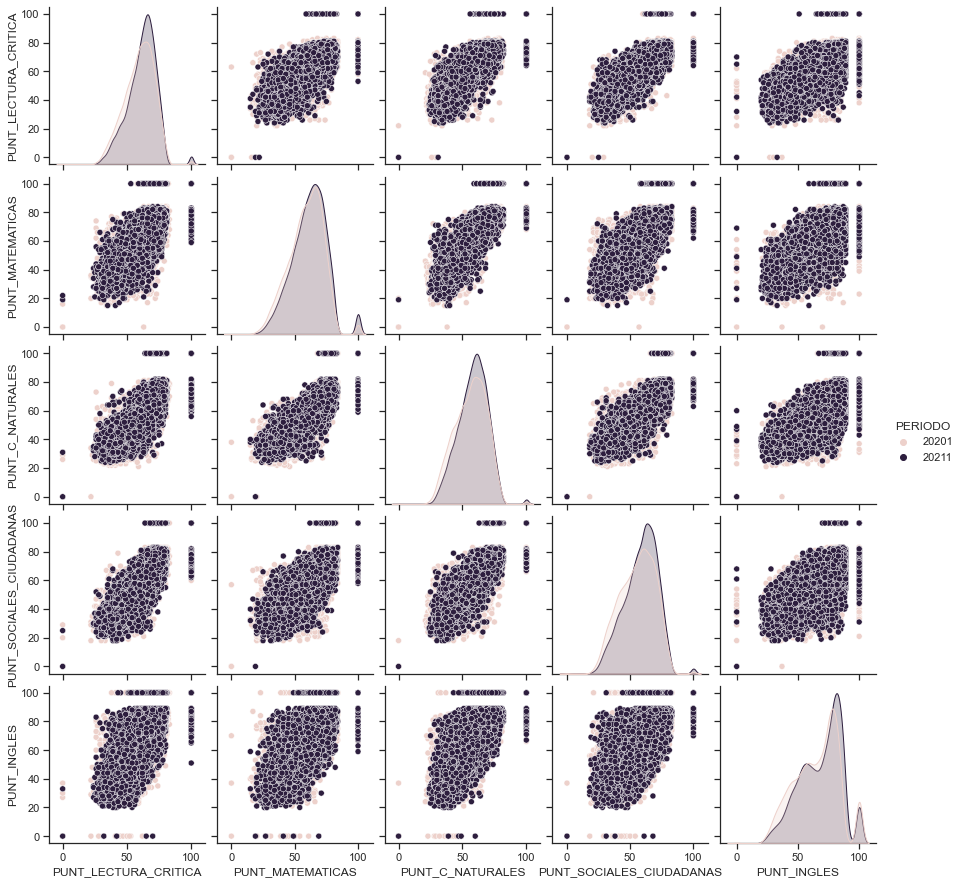

In [38]:
#Análisis pair plot unificado
variables_pair1=["PERIODO","PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",  "PUNT_SOCIALES_CIUDADANAS",  "PUNT_INGLES"]
pair2020_=seleccion_variables_usar(df2020,variables_pair1)
pair2021_=seleccion_variables_usar(df2021,variables_pair1)
icfes = [pair2020_,pair2021_]
pair_2020_2021=pd.concat(icfes,ignore_index = True)

sns.set_theme(style="ticks")
sns.pairplot(pair_2020_2021,hue = "PERIODO")

In [ ]:
# Analizando el gráfico de dispersión unificado encontramos que el comportamiento de las puntajes para los dos sets de comparación son muy similares, no se observa una clara diferencia en cuanto al desempeño en diferentes
# ambitos no hay un desempeño diferenteque se pueda derivar al efecto de la pandemia. Se debe entrar a realizar una análisis que involucre más variables para poder encontrar una posible variación en cuanto a lso resultados. 

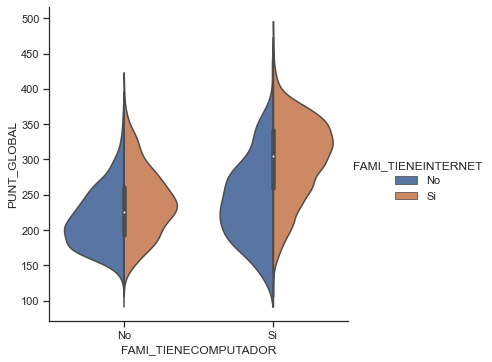

In [42]:
# Continuando con el análisis para determinar si la pandemia tuvo un efecto en el desempeño de los estudiantes se revisará  si el puntaje final se vió afectado por las variables  "FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "ESTU_DEDICACIONINTERNET"
pande20 = sns.catplot(x="FAMI_TIENECOMPUTADOR", y ="PUNT_GLOBAL",
                                   hue="FAMI_TIENEINTERNET",data=df2020, kind = "violin", split=True)

#Analizando la representación gráfica de los resultados global de acuerdo al acceso a internet y al tener internet se puede observar que existe una gran diferencia entre los resultados de los estudiantes que tienen computador o no. Claramente
#se ve que los estudiantes que tienen acceso a un computador tuvieron un mejor resutlado en los examnes sobre los que no tienen computador. Adicoinalmente, se observa que los estudiantes que tienen un computador y acceso a internet tienen un mejor
#resultado que los estudiantes que no tienen acceso. 

#Por lo anterior se puede llegar a una primera idea que el acceso a internet mejora el posible resultado de los examenes icfes.

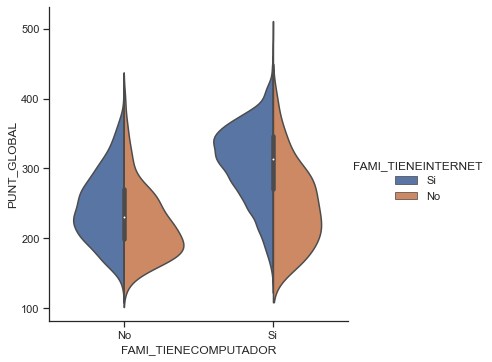

In [41]:
pande21 = sns.catplot(x="FAMI_TIENECOMPUTADOR", y ="PUNT_GLOBAL",
                                   hue="FAMI_TIENEINTERNET",data=df2021, kind = "violin", split=True)
#Año 2021
#Analizando la representación gráfica de los resultados global de acuerdo al acceso a internet y al tener internet se puede observar que existe una gran diferencia entre los resultados de los estudiantes que tienen acceso a internet o no. Claramente
#se ve que los estudiantes que tienen acceso a un internet  tuvieron un mejor resutlado en los examnes sobre los que no tienen acceso . Adicoinalmente, se observa que en comparación con el año inmediatamente anterior los estudiantes que tenían computador pero no acceso a internet
#presentaron resultados similares a los que no tenían acceso a un pc.  

#Puede que esta variación en los resultados se deba que en la época de pandemia los estudiantes que tenían un pc no podían conectarse a las clases o demás herramientas de estudio y por lo cual su resultado es similar a los estudiantes 
#que no tienen un pc.

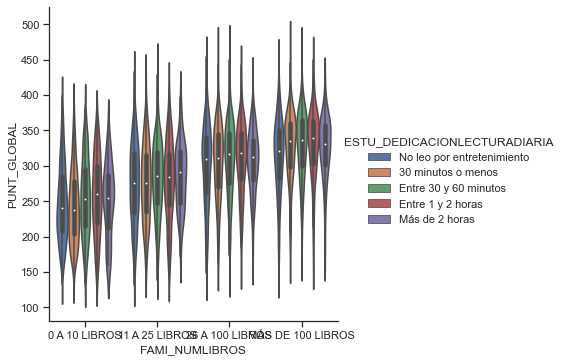

In [44]:
pande = sns.catplot(x="FAMI_NUMLIBROS", y ="PUNT_GLOBAL",
                                   hue="ESTU_DEDICACIONLECTURADIARIA",data=df2020, kind = "violin")

#Adicionalmente se revisa el efecto del posible resultado en el puntaje global de la prueba pueda ser afectado por la dedicación el hambito de lectura. En el gráfico se observa como el resultado de la prueba aumenta en relación 
#a la ayor cantidad de libros que tenga la familia. Sin embargo, el resultado no aumenta en relación a la cantidad de horas dedicadas el ambito de lectura. 

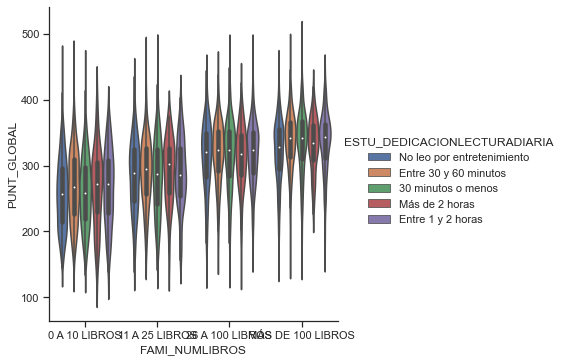

In [45]:
pande = sns.catplot(x="FAMI_NUMLIBROS", y ="PUNT_GLOBAL",
                                   hue="ESTU_DEDICACIONLECTURADIARIA",data=df2021, kind = "violin")

#Los resultados de la prueba relacionado a la cantidad de libros y el ambito de lectura después de a época de pandemia refleja que en comparación con el año inmediatamente anterior más alto. Se mantiene el comportamiento
# que los reslutados mejoran a medido que la familia tiene una mayor cantidad d elibres pero el comportamiento de los resultados no mejor con un aumento en el ambito de lecutra. b

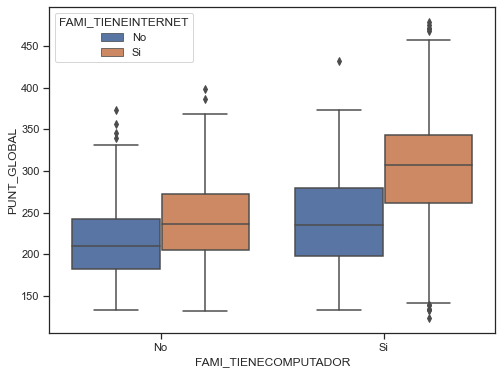

In [57]:
x=8
y=6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_TIENECOMPUTADOR", y ="PUNT_GLOBAL", hue ="FAMI_TIENEINTERNET",
                data=df2020)
plt.show()

#Por medio del boxplot se encuentra y reafirma que el acciso a un computados con internet tiene un efecto positivo sobre el puntaje global en los resultados del icfes. Para el año 2020 los reusltados muestran que la media de los estudiantes
#que tenían acceso a un pc on internet está muy superior a los estudiantes sin pc y sin acceso a internet.


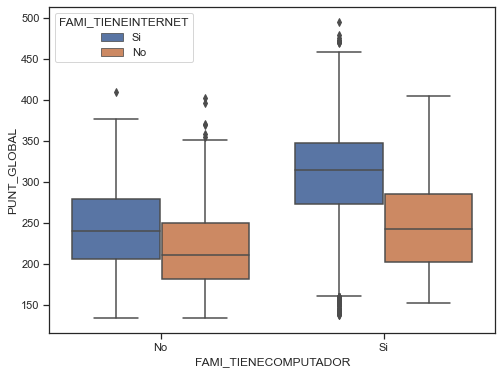

In [58]:
x=8
y=6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_NUMLIBROS", y ="PUNT_GLOBAL", hue ="FAMI_TIENEINTERNET",
                data=df2021)
plt.show()

#En el año 2021 encontramos que los resultados tiene un comportamiento muy similar a los del año inmediatamente anterior. Los estudiantes con acceso a un pc presentan en promedio un resultado mayor en el ICFES 
#pero el verdadero efecto positivo y que se evidencia de forma clara es el acceso a internet. Se observa un comportamiento muy similar al del año pasado donde los estudiantes con pc y acceso a internet tienen mejores 
#resultados que los que no tienen los dos, alguno o ninguna de estas dos opciones.



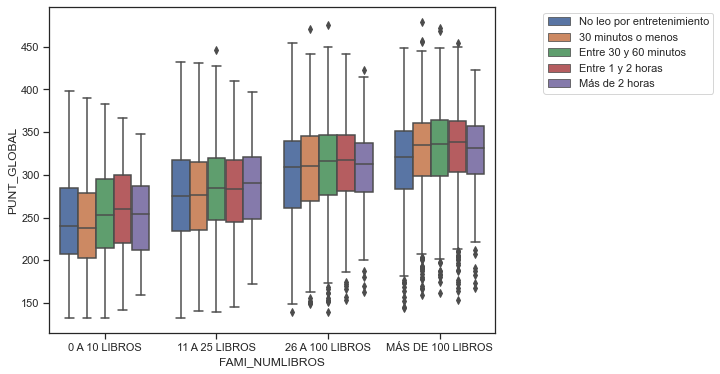

In [68]:
x=8
y=6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_NUMLIBROS", y ="PUNT_GLOBAL", hue ="ESTU_DEDICACIONLECTURADIARIA",
                data=df2020)
plt.legend(bbox_to_anchor=(1,1,.5,0), loc = "upper right")
plt.show()

#En cuanto al análisis del efecto del habíto de lectura sobre los resultados del ICFES encontramos que efectivamente existe una mejoría en cuanto a los resutlados del examen cuando la cantidad de libros en casa aumenta.
#Sin embargo, la media entre grupo de libros y relacionado con el tiempo dedicado al habito de lectura no presenta grandes diferences, no se evidencia una diferencia significativa entre los grupos.


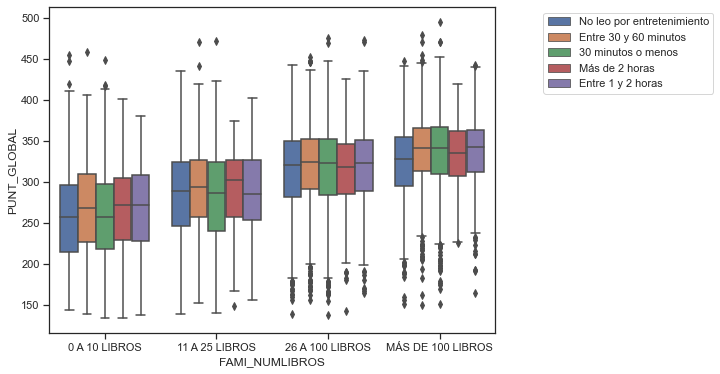

In [69]:
x=8
y=6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_NUMLIBROS", y ="PUNT_GLOBAL", hue ="ESTU_DEDICACIONLECTURADIARIA",
                data=df2021)
plt.legend(bbox_to_anchor=(1,1,.5,0), loc = "upper right")
plt.show()

#Para el año 2021 no se evidencia que el comportamiento de los resultados de la prueba en realción a la cantidad de libros varie frente a lo del año inmediatamente anterior. Se observa que efectivamente el aumento en la cantidad de libros
#en la casa representa un mejor resultado promedio en el ICFES. Adicionalmente, se evidencia que el tiempo dedicado al ambito de lecutra no tiene gran diferencia entre los grupos.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [78]:
#Selección de variable a usar en el modelo
variables_modelo1 = ["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "PUNT_GLOBAL"]
variables_modelo2 = ["FAMI_NUMLIBROS", "ESTU_DEDICACIONLECTURADIARIA",   "PUNT_GLOBAL"]


In [99]:
#Construcción de los dos df a usar para el modelo
df2020_modelo1 =seleccion_variables_usar(df2020,variables_modelo1)
df2021_modelo1 =seleccion_variables_usar(df2020,variables_modelo1)

df2020_modelo2 =seleccion_variables_usar(df2021,variables_modelo2)
df2021_modelo2 =seleccion_variables_usar(df2021,variables_modelo2)


df2020_modelo2

,FAMI_NUMLIBROS,ESTU_DEDICACIONLECTURADIARIA,PUNT_GLOBAL
ESTU_CONSECUTIVO,,,
SB11202110042506,0 A 10 LIBROS,No leo por entretenimiento,303
SB11202110041799,11 A 25 LIBROS,No leo por entretenimiento,325
SB11202110043835,0 A 10 LIBROS,Entre 30 y 60 minutos,374
SB11202110043668,26 A 100 LIBROS,No leo por entretenimiento,282
SB11202110043350,11 A 25 LIBROS,Entre 30 y 60 minutos,288
...,...,...,...
SB11202110039404,11 A 25 LIBROS,30 minutos o menos,179
SB11202110038427,0 A 10 LIBROS,No leo por entretenimiento,254
SB11202110038394,26 A 100 LIBROS,Entre 30 y 60 minutos,303


In [100]:
#Covnersión de variables categóricas en dummy 
#modelo 1
modelo1_2020=pd.get_dummies(df2020_modelo1, columns = ["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR"])
modelo1_2021=pd.get_dummies(df2021_modelo1, columns = ["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR"])

modelo1_2021.head(10)

,PUNT_GLOBAL,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si
ESTU_CONSECUTIVO,,,,,
SB11202010045555,164,1,0,1,0
SB11202010045719,202,0,0,0,0
SB11202010070662,162,1,0,1,0
SB11202010069926,188,0,1,0,1
SB11202010023181,274,0,1,0,1
SB11202010057992,198,0,1,0,1
SB11202010074718,160,0,0,0,0
SB11202010070513,207,1,0,1,0
SB11202010067334,162,0,1,0,1


In [105]:
#Covnersión de variables categóricas en dummy 
#modelo 2
modelo2_2020=pd.get_dummies(df2020_modelo2, columns = ["FAMI_NUMLIBROS", "ESTU_DEDICACIONLECTURADIARIA"])
modelo2_2021=pd.get_dummies(df2021_modelo2, columns = ["FAMI_NUMLIBROS", "ESTU_DEDICACIONLECTURADIARIA"])

modelo2_2020.head(10)

,PUNT_GLOBAL,FAMI_NUMLIBROS_0 A 10 LIBROS,FAMI_NUMLIBROS_11 A 25 LIBROS,FAMI_NUMLIBROS_26 A 100 LIBROS,FAMI_NUMLIBROS_MÁS DE 100 LIBROS,ESTU_DEDICACIONLECTURADIARIA_30 minutos o menos,ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas,ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos,ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas,ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento
ESTU_CONSECUTIVO,,,,,,,,,,
SB11202110042506,303,1,0,0,0,0,0,0,0,1
SB11202110041799,325,0,1,0,0,0,0,0,0,1
SB11202110043835,374,1,0,0,0,0,0,1,0,0
SB11202110043668,282,0,0,1,0,0,0,0,0,1
SB11202110043350,288,0,1,0,0,0,0,1,0,0
SB11202110040553,316,0,0,0,1,1,0,0,0,0
SB11202110043555,293,0,0,0,1,0,0,0,0,1
SB11202110041978,371,0,0,0,1,0,0,0,1,0
SB11202110042217,240,1,0,0,0,0,1,0,0,0


In [125]:
#Desarrollo del modelo
#Modelo 1
#Predictores
#Para el modelo 1 usaremos como preditores el acceso a internet y si tienen un pc en la casa
predictores1_2020= modelo1_2020[["FAMI_TIENEINTERNET_No","FAMI_TIENEINTERNET_Si","FAMI_TIENECOMPUTADOR_No","FAMI_TIENECOMPUTADOR_Si"]]
v_dependiente1_2020 =modelo1_2020[["PUNT_GLOBAL"]]

predictores1_2021= modelo1_2021[["FAMI_TIENEINTERNET_No","FAMI_TIENEINTERNET_Si","FAMI_TIENECOMPUTADOR_No","FAMI_TIENECOMPUTADOR_Si"]]
v_dependiente1_2021 =modelo1_2021[["PUNT_GLOBAL"]]


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [126]:
#Modelo año 2020
X_train, X_test, y_train, y_test = train_test_split(predictores1_2020,v_dependiente1_2020, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

C:\Users\sots_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sots_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.007126660187884677

In [135]:
#Accuracy del modelo 1 2020
print("Accuracy")
print(lr.score(X_test, y_test))


Accuracy
0.009658725048293626


In [136]:
#Modelo año 2021
X_train, X_test, y_train, y_test = train_test_split(predictores1_2021,v_dependiente1_2021, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

C:\Users\sots_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sots_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.008098477486232589

In [137]:
#Accuracy modelo 1 2020
print("Accuracy")
print(lr.score(X_test, y_test))


Accuracy
0.008098477486232589


In [128]:
#Desarrollo del modelo
#Modelo 2
#Predictores
#Para el modelo 2 usaremos como preditores cantidad de libros y horas dedicadas a la lectura
predictores2_2020= modelo2_2020[["FAMI_NUMLIBROS_0 A 10 LIBROS","FAMI_NUMLIBROS_11 A 25 LIBROS","FAMI_NUMLIBROS_26 A 100 LIBROS","FAMI_NUMLIBROS_MÁS DE 100 LIBROS","ESTU_DEDICACIONLECTURADIARIA_30 minutos o menos","ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas","ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos","ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas","ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento"]]
v_dependiente2_2020 =modelo2_2020[["PUNT_GLOBAL"]]

predictores2_2021= modelo2_2021[["FAMI_NUMLIBROS_0 A 10 LIBROS","FAMI_NUMLIBROS_11 A 25 LIBROS","FAMI_NUMLIBROS_26 A 100 LIBROS","FAMI_NUMLIBROS_MÁS DE 100 LIBROS","ESTU_DEDICACIONLECTURADIARIA_30 minutos o menos","ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas","ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos","ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas","ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento"]]
v_dependiente2_2021 =modelo2_2021[["PUNT_GLOBAL"]]

In [129]:
#Modelo año 2020
X_train, X_test, y_train, y_test = train_test_split(predictores2_2020,v_dependiente2_2020, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

C:\Users\sots_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.006761107533805538

In [ ]:
#Accuracy modelo 2 2020
print("Accuracy")
print(lr.score(X_test, y_test))

In [130]:
#Modelo año 2021
X_train, X_test, y_train, y_test = train_test_split(predictores2_2021,v_dependiente2_2021, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

C:\Users\sots_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.009658725048293626

In [ ]:
#Accuracy modelo 2 2021
print("Accuracy")
print(lr.score(X_test, y_test))

In [141]:
#Conclusiones de los modelos

#De acuerdo a los dos modelos desarrollados donde el primero modelo buscaba una relación entre el acceso a internet, a un computador y su efecto sobre el puntaje global los resultados arrijaron que estas variables no son 
#significativas para predecir el desempeño del estudiante en la prueba nacional ICFES. El modelo de regresión logic que se implementó para el desarrollo del modelo arroja que el modelo tiene menos 1% de la capacidad para 
#predecir el resultado en el examen nacional. Este resultado se mantiene para ambos datasets analizados, para el año 2020 y 2021 los resultados arrojan que el modelo no es estadisticamente útil para predecir el desempeño del 
#estudiante. 

#Aun cuando los reulstados del modelo no arrojan resultados satisfactorios para la descripción de la variable dependiente no significa que un modelo que relacione el desempeño del estudiante frente a su acceso a tecnologí e internet,
#un modelo que involucre más variables categóricas describe de mejor forma este resultado en el icfes.

#Por otra parte el modelo 2 que buscaba describir el resultado en las pruebas icfes de acuerdo a la cantidad de libros en casa y el habito de lectura arrojó que su capacidad predictiva es muy baja. Para este modelo y para 
#los dos años analizados encontramos que su capacidad predictica es menor del 1% y por esto no es un modelo estadisticamente útil. Las dos variables predictores que fueron la cantidad de libros y el tiempo dedicado a la lectura 
#no son suficientes para predecir el desempeño del estudiante, pero no significa que un modelo que involucre estas variables y cualquier otra pueda ser útilmente para el objetivo. 

#En conclusión se puede decir que los efectos de la pandemia sobre los resultados de los estudiantes en la prueba icfes no es explicado por el acceso de los individuos a recursos de estudio diferentes a la escuela particular. Con los modelos
#creados se puede  observar que realemente el puntaje en la prueba está más realcionado con otras variables y por el momento estos métodos alternativos de estudio no son tan representativos para los estudiantes. Sin embargo, creemos ques
# de gran útilidad realizar el seguimiento de esta interacción debido a que los efectos de la pandemia no se vean reflejados de forma inmediata (corto plazo) sino en un término de 3 a 5 años. 

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [198]:
variables_interact1 = ["PERIODO","FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "PUNT_GLOBAL"]
variables_interact2 = ["PERIODO","FAMI_NUMLIBROS", "ESTU_DEDICACIONLECTURADIARIA",   "PUNT_GLOBAL"]

df2020_interact1 =seleccion_variables_usar(df2020,variables_interact1)
df2021_interact1 =seleccion_variables_usar(df2021,variables_interact1)

interactivo=[df2020_interact1,df2021_interact1]
interact_2020_2021=pd.concat(interactivo,ignore_index = True)

In [197]:
import panel as pn
import plotly.graph_objects as go
pn.extension('plotly')
titulo = 'Modelo 1: Resultados de acuerdo a acceso a internet y pc'
seleccion = pn.widgets.Select(name='PERIODO', options= interact_2020_2021['PERIODO'].unique().tolist())

In [199]:
# Le decimos a panel que nuestro gráfico depende de cambios en el párametro seleccion.
@pn.depends(seleccion.param.value)

# Definimos la función que se encarga de la interactividad del tablero de control.
def funcion_interactiva(seleccion): 
    # Cargamos los datos.
    df = interact_2020_2021 
    # Creamos un filtro de datos que utiliza valores de la lista desplegable.
    filtro = (df['PERIODO'] == seleccion) 
    # Filtramos el DataFrame.
    df = df.loc[filtro]
    
    # Definimos y retornamos la figura.
    fig = go.Figure(go.Box(
                            x=df["FAMI_TIENECOMPUTADOR"],
                            y=df["PUNT_GLOBAL"],
                          )
                   )
    fig.update_layout(
                    yaxis_title="Puntaje",
                    xaxis_title="Tiene computador",
                    title= 'Modelo 1 '+ str(seleccion),
                    xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                    yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                    plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                    showlegend=False,                                          # Ocultamos la leyenda.
                 )
    return fig

In [200]:
tablero_control = pn.Row(pn.Column(titulo, seleccion), funcion_interactiva)
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='PERIODO', options=[20201, 20211], value=20201)
    [1] ParamFunction(function)

In [201]:
# Le decimos a panel que nuestro gráfico depende de cambios en el párametro seleccion.
@pn.depends(seleccion.param.value)

# Definimos la función que se encarga de la interactividad del tablero de control.
def funcion_interactiva(seleccion): 
    # Cargamos los datos.
    df = interact_2020_2021 
    # Creamos un filtro de datos que utiliza valores de la lista desplegable.
    filtro = (df['PERIODO'] == seleccion) 
    # Filtramos el DataFrame.
    df = df.loc[filtro]
    
    # Definimos y retornamos la figura.
    fig = go.Figure(go.Box(
                            x=df["FAMI_TIENEINTERNET"],
                            y=df["PUNT_GLOBAL"],
                          )
                   )
    fig.update_layout(
                    yaxis_title="Puntaje",
                    xaxis_title="Tiene internet",
                    title= 'Modelo 1 '+ str(seleccion),
                    xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                    yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                    plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                    showlegend=False,                                          # Ocultamos la leyenda.
                 )
    return fig

In [202]:
tablero_control = pn.Row(pn.Column(titulo, seleccion), funcion_interactiva)
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='PERIODO', options=[20201, 20211], value=20201)
    [1] ParamFunction(function)

In [208]:
df2020_interact2 =seleccion_variables_usar(df2020,variables_interact2)
df2021_interact2 =seleccion_variables_usar(df2021,variables_interact2)

interactivo2=[df2020_interact2,df2021_interact2]
m2interact_2020_2021=pd.concat(interactivo2,ignore_index = True)

In [209]:
pn.extension('plotly')
titulo = 'Modelo 1: Resultados de acuerdo a acceso a internet y pc'
seleccion = pn.widgets.Select(name='PERIODO', options= m2interact_2020_2021['PERIODO'].unique().tolist())
m2interact_2020_2021

,PERIODO,FAMI_NUMLIBROS,ESTU_DEDICACIONLECTURADIARIA,PUNT_GLOBAL
0,20201,0 A 10 LIBROS,No leo por entretenimiento,164
1,20201,NaN,NaN,202
2,20201,0 A 10 LIBROS,30 minutos o menos,162
3,20201,11 A 25 LIBROS,30 minutos o menos,188
4,20201,26 A 100 LIBROS,No leo por entretenimiento,274
...,...,...,...,...
30958,20211,11 A 25 LIBROS,30 minutos o menos,179
30959,20211,0 A 10 LIBROS,No leo por entretenimiento,254
30960,20211,26 A 100 LIBROS,Entre 30 y 60 minutos,303
30961,20211,MÁS DE 100 LIBROS,Entre 30 y 60 minutos,285


In [210]:
# Le decimos a panel que nuestro gráfico depende de cambios en el párametro seleccion.
@pn.depends(seleccion.param.value)

# Definimos la función que se encarga de la interactividad del tablero de control.
def funcion_interactiva(seleccion): 
    # Cargamos los datos.
    df = m2interact_2020_2021 
    # Creamos un filtro de datos que utiliza valores de la lista desplegable.
    filtro = (df['PERIODO'] == seleccion) 
    # Filtramos el DataFrame.
    df = df.loc[filtro]
    
    # Definimos y retornamos la figura.
    fig = go.Figure(go.Box(
                            x=df["FAMI_NUMLIBROS"],
                            y=df["PUNT_GLOBAL"],
                          )
                   )
    fig.update_layout(
                    yaxis_title="Puntaje",
                    xaxis_title="Tiene computador",
                    title= 'Modelo 1 '+ str(seleccion),
                    xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                    yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                    plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                    showlegend=False,                                          # Ocultamos la leyenda.
                 )
    return fig

In [211]:
tablero_control = pn.Row(pn.Column(titulo, seleccion), funcion_interactiva)
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='PERIODO', options=[20201, 20211], value=20201)
    [1] ParamFunction(function)

In [212]:
# Le decimos a panel que nuestro gráfico depende de cambios en el párametro seleccion.
@pn.depends(seleccion.param.value)

# Definimos la función que se encarga de la interactividad del tablero de control.
def funcion_interactiva(seleccion): 
    # Cargamos los datos.
    df = m2interact_2020_2021 
    # Creamos un filtro de datos que utiliza valores de la lista desplegable.
    filtro = (df['PERIODO'] == seleccion) 
    # Filtramos el DataFrame.
    df = df.loc[filtro]
    
    # Definimos y retornamos la figura.
    fig = go.Figure(go.Box(
                            x=df["ESTU_DEDICACIONLECTURADIARIA"],
                            y=df["PUNT_GLOBAL"],
                          )
                   )
    fig.update_layout(
                    yaxis_title="Puntaje",
                    xaxis_title="Tiene computador",
                    title= 'Modelo 1 '+ str(seleccion),
                    xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                    yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                    plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                    showlegend=False,                                          # Ocultamos la leyenda.
                 )
    return fig

In [213]:
tablero_control = pn.Row(pn.Column(titulo, seleccion), funcion_interactiva)
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='PERIODO', options=[20201, 20211], value=20211)
    [1] ParamFunction(function)